## Feature Engineering (FE) & EDA Assignment_Mortgage --Yidan Li yl4357

In [42]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns

In [43]:
df=pd.read_csv('/Users/liyidan/Desktop/Anomaly Detection/2. Mortgage/XYZloan_default_selected_vars.csv')
print(df.head(3))
print(df['loan_default'].value_counts())

   Unnamed: 0  Unnamed: 0.1     id  loan_default  AP001  AP002  AP003  AP004  \
0       77529         77530  77530             0     35      1      1     12   
1       50585         50586  50586             0     41      2      1     12   
2       35917         35918  35918             0     38      1      1     12   

           AP005 AP006  ...  CD162  CD164   CD166   CD167   CD169   CD170  \
0  5/10/17 18:16    h5  ...   14.0   14.0   335.0   335.0  1456.0  1456.0   
1   7/4/17 11:07    h5  ...   27.0   27.0  1594.0  1594.0  3016.0  3016.0   
2  6/27/17 13:36    h5  ...   20.0   15.0  1752.0  1221.0  2831.0  1987.0   

    CD172   CD173  MB005  MB007  
0  2038.0  2038.0   10.0    WEB  
1  4690.0  4690.0    8.0    WEB  
2  2831.0  1987.0    5.0    WEB  

[3 rows x 89 columns]
0    64512
1    15488
Name: loan_default, dtype: int64


### Data Cleaning

In [44]:
#AP002 is gender, better be encoded as 0/1
df['AP002']=df['AP002'].replace(2,0)

In [45]:
df.dtypes

Unnamed: 0        int64
Unnamed: 0.1      int64
id                int64
loan_default      int64
AP001             int64
                 ...   
CD170           float64
CD172           float64
CD173           float64
MB005           float64
MB007            object
Length: 89, dtype: object

In [46]:
print(df.columns[df.isnull().any()])  #columns with NA values
print(df.select_dtypes(include=['float64','int64']).columns)  #numeric columns
print(df.select_dtypes(include=['object']).columns)  #categorical columns
#all columns with NA values are numeric

Index(['TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP007', 'AP008', 'AP009', 'TD001', 'TD002', 'TD005',
       'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD022', 'TD023',
       'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029', 'TD044', 'TD048',
       'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004', 'CR005', 'CR009',
      

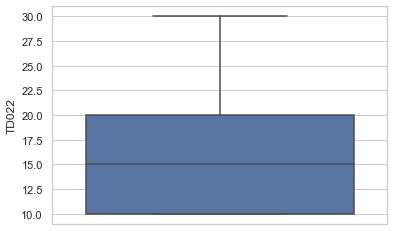

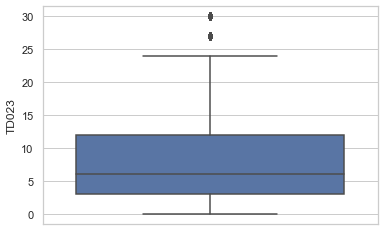

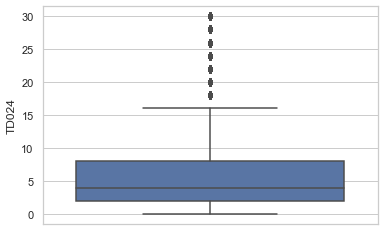

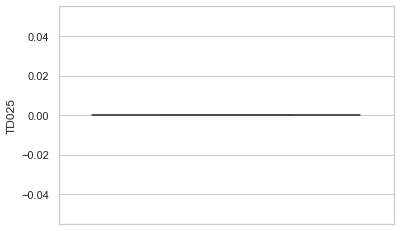

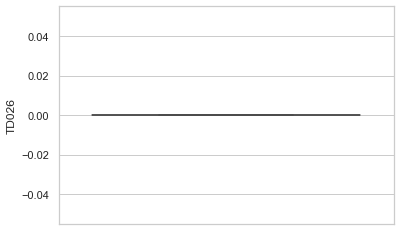

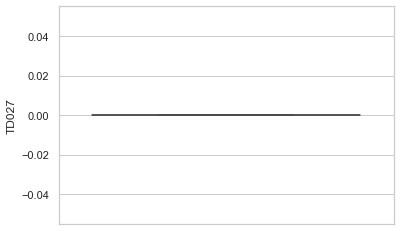

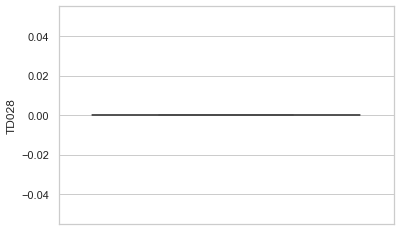

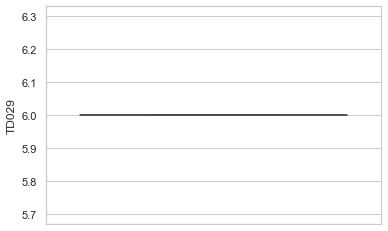

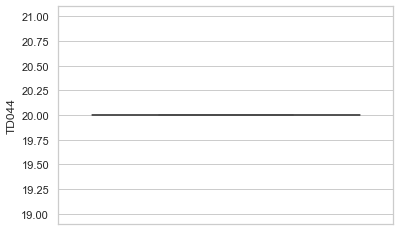

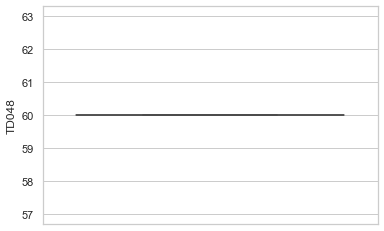

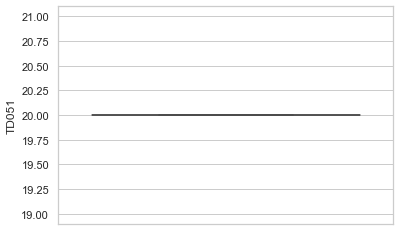

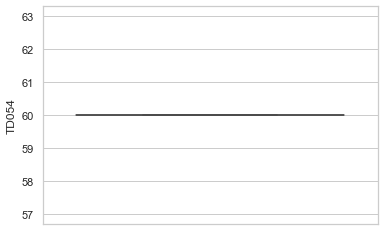

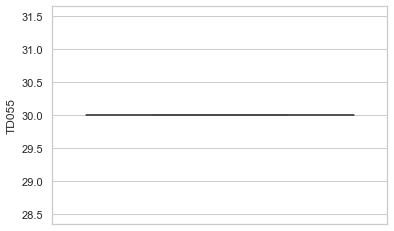

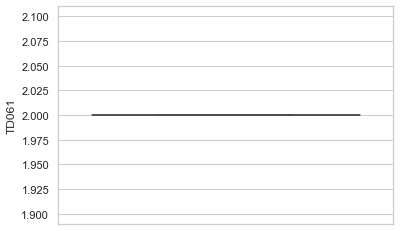

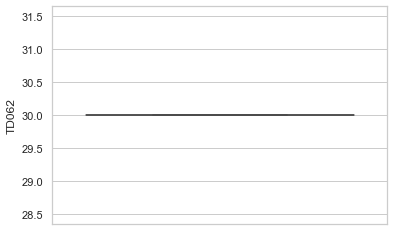

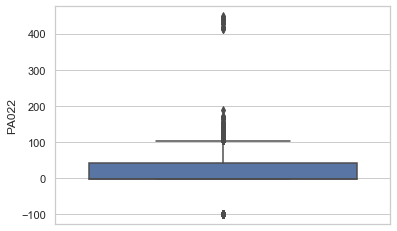

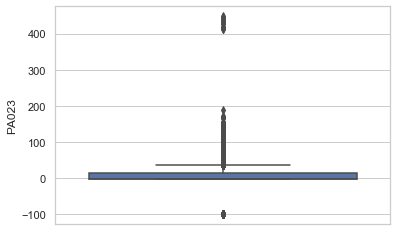

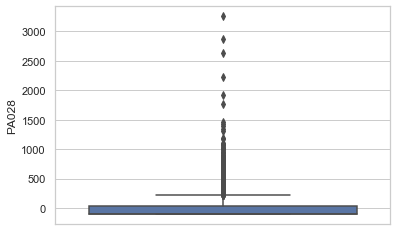

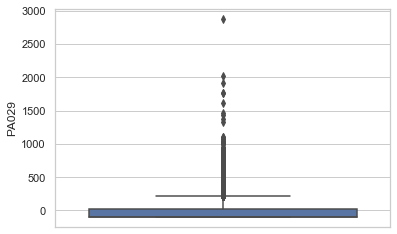

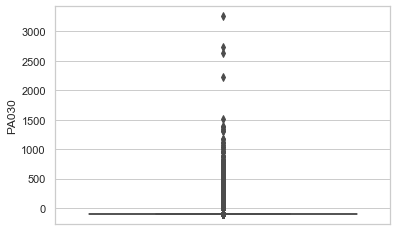

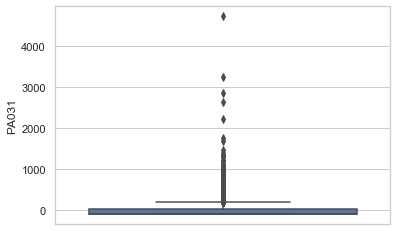

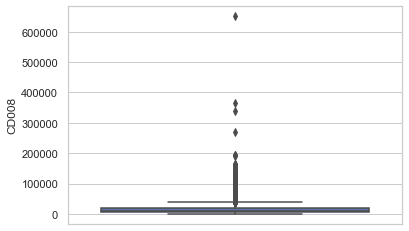

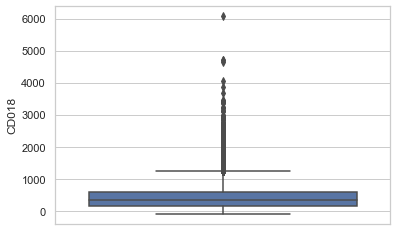

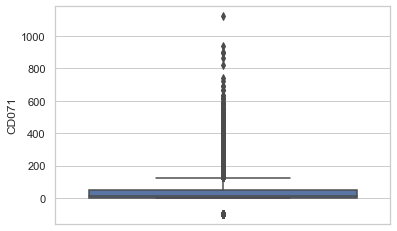

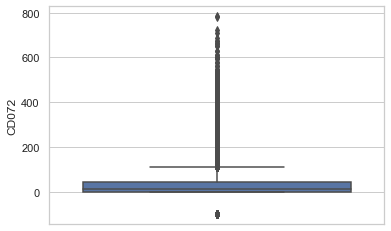

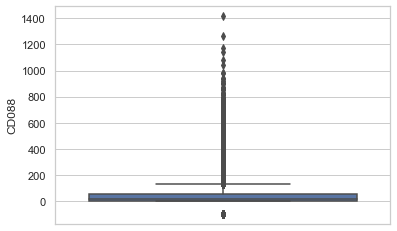

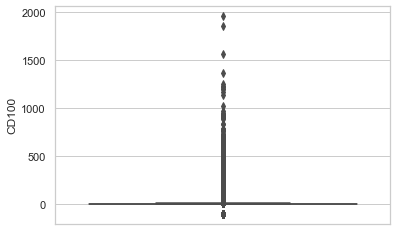

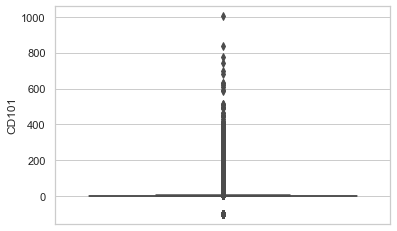

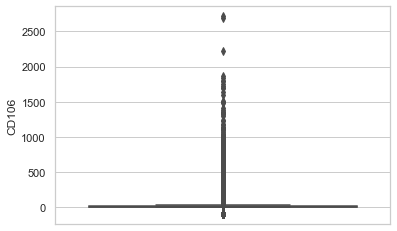

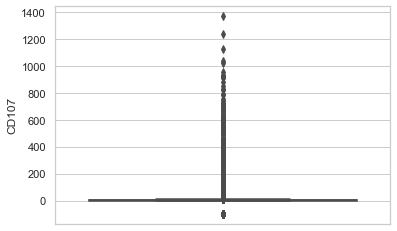

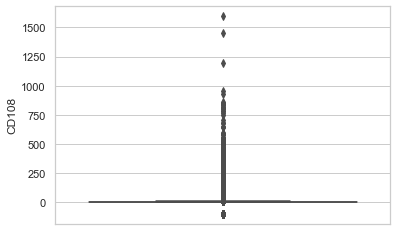

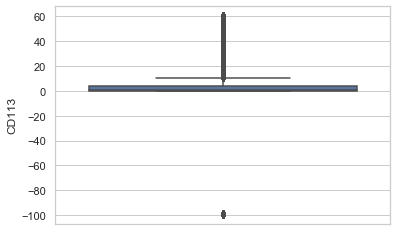

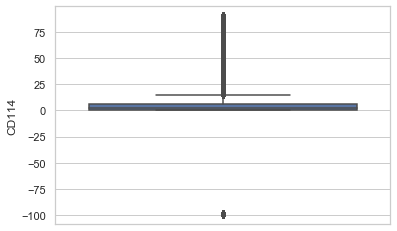

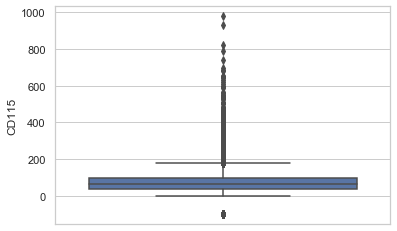

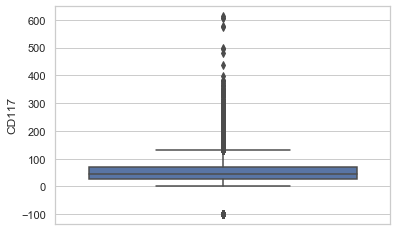

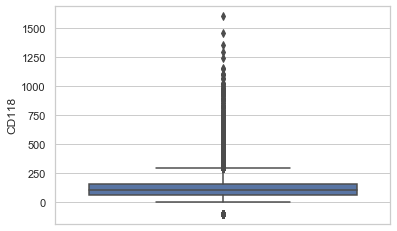

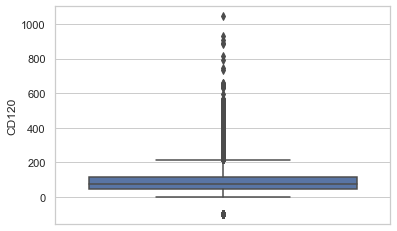

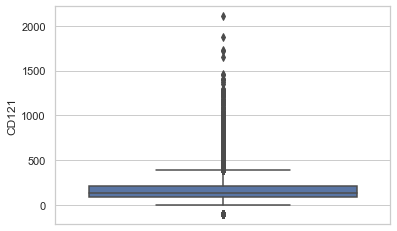

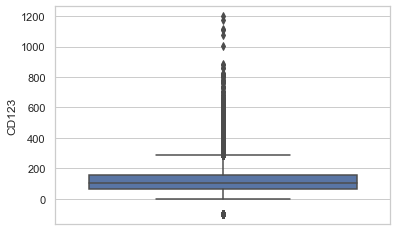

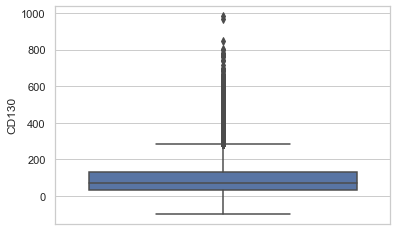

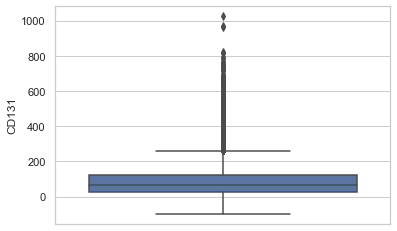

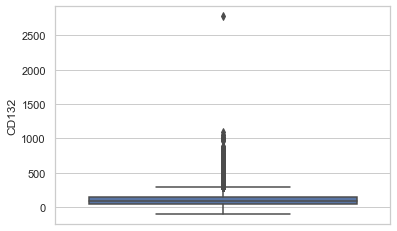

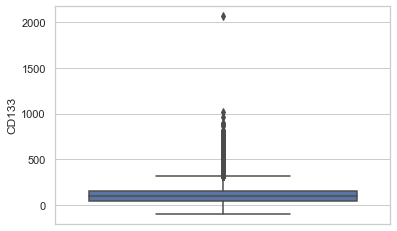

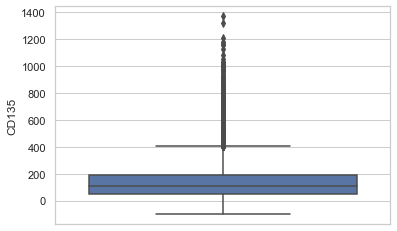

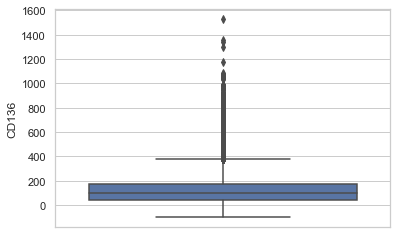

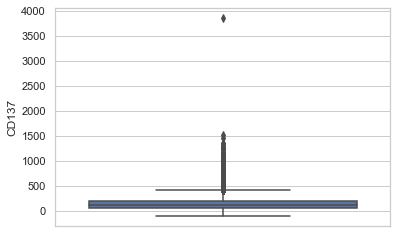

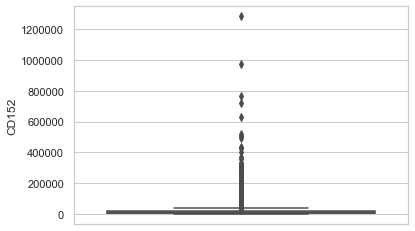

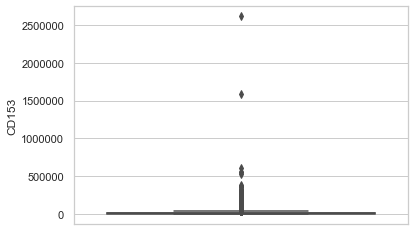

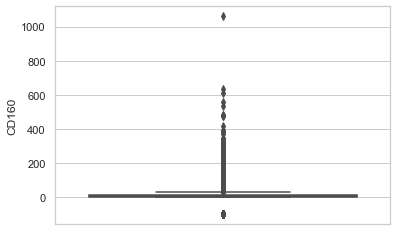

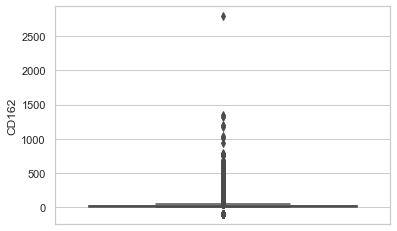

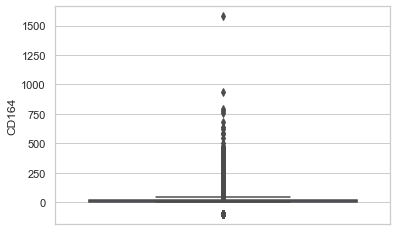

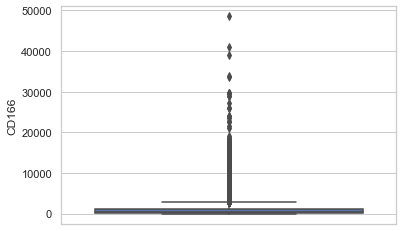

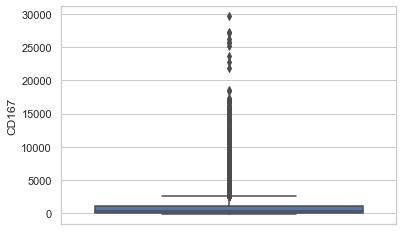

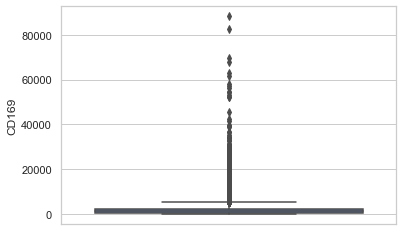

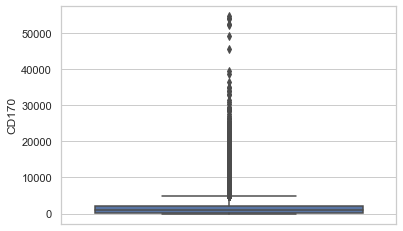

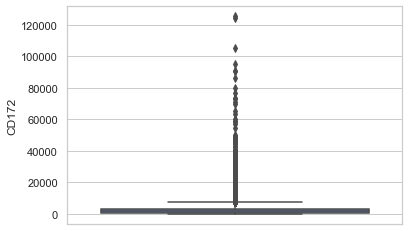

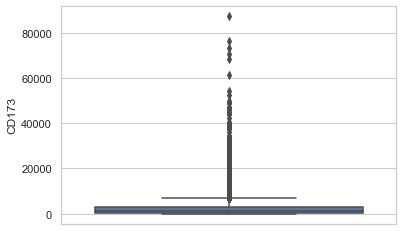

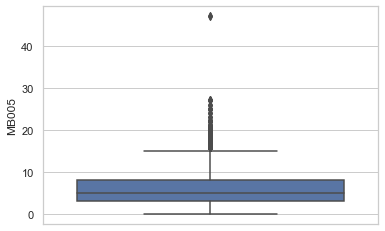

In [47]:
#visualize the distribution of numeric variables with NA values
def distribution_sns(var):
    sns.set(style="whitegrid")
    sns.boxplot(y=var,color="b",data=df)
    plt.show()

for i in df.columns[df.isnull().any()].tolist():
    distribution_sns(i)

In [48]:
#drop variables that we don't know the meaning/only have value for one observation/not useful for prediction
df=df.drop(['id','Unnamed: 0', 'Unnamed: 0.1','TD025', 'TD026','TD027','TD028','TD029','TD044','TD048',
            'TD051','TD054','TD055','TD061','TD062','CR012'], axis=1)

According to the variable description, variable PA022-CD173 should all be positive, but they all have negative values inside as shown in the above boxplots, like -99, -98, -1, which should be put in a new category, these variables will be included in the same category with NA values.

### continous variable with missing values and negative values

In [49]:
def binning(var):
    df[var].loc[df[var]==-99]=float('NaN')
    df[var].loc[df[var]==-98]=float('NaN')
    df[var].loc[df[var]==-1]=float('NaN')#convert all negative values to NA values
    df[var + '_bin'] = pd.qcut(df[var],10,duplicates='drop').values.add_categories("NoData")
    df[var + '_bin'] = df[var + '_bin'].fillna("NoData").astype(str) #assign NA values the category 'NoData'
    
   
for i in (df.columns[df.isnull().any()].tolist()):
    binning(i)

/Users/liyidan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [50]:
df.columns.values.tolist()

['loan_default',
 'AP001',
 'AP002',
 'AP003',
 'AP004',
 'AP005',
 'AP006',
 'AP007',
 'AP008',
 'AP009',
 'TD001',
 'TD002',
 'TD005',
 'TD006',
 'TD009',
 'TD010',
 'TD013',
 'TD014',
 'TD015',
 'TD022',
 'TD023',
 'TD024',
 'CR004',
 'CR005',
 'CR009',
 'CR015',
 'CR017',
 'CR018',
 'CR019',
 'PA022',
 'PA023',
 'PA028',
 'PA029',
 'PA030',
 'PA031',
 'CD008',
 'CD018',
 'CD071',
 'CD072',
 'CD088',
 'CD100',
 'CD101',
 'CD106',
 'CD107',
 'CD108',
 'CD113',
 'CD114',
 'CD115',
 'CD117',
 'CD118',
 'CD120',
 'CD121',
 'CD123',
 'CD130',
 'CD131',
 'CD132',
 'CD133',
 'CD135',
 'CD136',
 'CD137',
 'CD152',
 'CD153',
 'CD160',
 'CD162',
 'CD164',
 'CD166',
 'CD167',
 'CD169',
 'CD170',
 'CD172',
 'CD173',
 'MB005',
 'MB007',
 'TD022_bin',
 'TD023_bin',
 'TD024_bin',
 'PA022_bin',
 'PA023_bin',
 'PA028_bin',
 'PA029_bin',
 'PA030_bin',
 'PA031_bin',
 'CD008_bin',
 'CD018_bin',
 'CD071_bin',
 'CD072_bin',
 'CD088_bin',
 'CD100_bin',
 'CD101_bin',
 'CD106_bin',
 'CD107_bin',
 'CD108_bin

#### Encode the binned variables using WOEEncoder (Due to the large number of variables)

In [51]:
def WOE(var):
    k = df[[var,'loan_default']].groupby(var)['loan_default'].agg(['count','sum']).reset_index()
    k.columns = [var,'count','default']
    k['non-default'] = k['count'] - k['default']
    k['default %'] = (k['default']/ k['default'].sum()).round(2)*100
    k['non-default %'] = (k['non-default'] / k['non-default'].sum()).round(2)*100
    k[var+'_WOE'] = np.log(k['default %'] / k['non-default %']).round(2)
    #when non-default %=0 0/0->nan replace with 0    x(x!=0)/0->inf/-inf replace with 1
    k[var] = k[var].fillna(0)
    k=k.replace([np.inf,-np.inf], 1)
    return(k[[var,var+'_WOE']])

In [52]:
df = pd.merge(df,WOE('TD022_bin'),on='TD022_bin',how='left')
df = pd.merge(df,WOE('TD023_bin'),on='TD023_bin',how='left')
df = pd.merge(df,WOE('TD024_bin'),on='TD024_bin',how='left')
df = pd.merge(df,WOE('PA022_bin'),on='PA022_bin',how='left')
df = pd.merge(df,WOE('PA023_bin'),on='PA023_bin',how='left')
df = pd.merge(df,WOE('PA028_bin'),on='PA028_bin',how='left')
df = pd.merge(df,WOE('PA029_bin'),on='PA029_bin',how='left')
df = pd.merge(df,WOE('PA030_bin'),on='PA030_bin',how='left')
df = pd.merge(df,WOE('PA031_bin'),on='PA031_bin',how='left')
df = pd.merge(df,WOE('CD008_bin'),on='CD008_bin',how='left')
df = pd.merge(df,WOE('CD018_bin'),on='CD018_bin',how='left')
df = pd.merge(df,WOE('CD071_bin'),on='CD071_bin',how='left')
df = pd.merge(df,WOE('CD072_bin'),on='CD072_bin',how='left')
df = pd.merge(df,WOE('CD088_bin'),on='CD088_bin',how='left')
df = pd.merge(df,WOE('CD100_bin'),on='CD100_bin',how='left')
df = pd.merge(df,WOE('CD101_bin'),on='CD101_bin',how='left')
df = pd.merge(df,WOE('CD106_bin'),on='CD106_bin',how='left')
df = pd.merge(df,WOE('CD107_bin'),on='CD107_bin',how='left')
df = pd.merge(df,WOE('CD108_bin'),on='CD108_bin',how='left')
df = pd.merge(df,WOE('CD113_bin'),on='CD113_bin',how='left')
df = pd.merge(df,WOE('CD114_bin'),on='CD114_bin',how='left')
df = pd.merge(df,WOE('CD115_bin'),on='CD115_bin',how='left')
df = pd.merge(df,WOE('CD117_bin'),on='CD117_bin',how='left')
df = pd.merge(df,WOE('CD118_bin'),on='CD118_bin',how='left')
df = pd.merge(df,WOE('CD120_bin'),on='CD120_bin',how='left')
df = pd.merge(df,WOE('CD121_bin'),on='CD121_bin',how='left')
df = pd.merge(df,WOE('CD123_bin'),on='CD123_bin',how='left')
df = pd.merge(df,WOE('CD130_bin'),on='CD130_bin',how='left')
df = pd.merge(df,WOE('CD131_bin'),on='CD131_bin',how='left')
df = pd.merge(df,WOE('CD132_bin'),on='CD132_bin',how='left')
df = pd.merge(df,WOE('CD133_bin'),on='CD133_bin',how='left')
df = pd.merge(df,WOE('CD135_bin'),on='CD135_bin',how='left')
df = pd.merge(df,WOE('CD136_bin'),on='CD136_bin',how='left')
df = pd.merge(df,WOE('CD137_bin'),on='CD137_bin',how='left')
df = pd.merge(df,WOE('CD152_bin'),on='CD152_bin',how='left')
df = pd.merge(df,WOE('CD153_bin'),on='CD153_bin',how='left')
df = pd.merge(df,WOE('CD160_bin'),on='CD160_bin',how='left')
df = pd.merge(df,WOE('CD162_bin'),on='CD162_bin',how='left')
df = pd.merge(df,WOE('CD164_bin'),on='CD164_bin',how='left')
df = pd.merge(df,WOE('CD166_bin'),on='CD166_bin',how='left')
df = pd.merge(df,WOE('CD167_bin'),on='CD167_bin',how='left')
df = pd.merge(df,WOE('CD169_bin'),on='CD169_bin',how='left')
df = pd.merge(df,WOE('CD170_bin'),on='CD170_bin',how='left')
df = pd.merge(df,WOE('CD172_bin'),on='CD172_bin',how='left')
df = pd.merge(df,WOE('CD173_bin'),on='CD173_bin',how='left')
df = pd.merge(df,WOE('MB005_bin'),on='MB005_bin',how='left')
df.head(3)

,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,...,CD160_bin_WOE,CD162_bin_WOE,CD164_bin_WOE,CD166_bin_WOE,CD167_bin_WOE,CD169_bin_WOE,CD170_bin_WOE,CD172_bin_WOE,CD173_bin_WOE,MB005_bin_WOE
0,0,35,1,1,12,5/10/17 18:16,h5,4,4,1,...,0.11,0.00,0.00,-0.11,-0.11,0.11,0.11,-0.11,0.11,-0.25
1,0,41,0,1,12,7/4/17 11:07,h5,2,2,1,...,0.10,0.12,0.11,0.11,0.11,0.20,0.11,0.11,0.20,-0.09
2,0,38,1,1,12,6/27/17 13:36,h5,5,3,0,...,0.10,0.10,0.00,0.11,0.11,0.20,0.11,0.11,0.11,0.00


#### For variables that are strings (AP005, AP006, MB007)

#### time data

In [53]:
#extract year, month, day, hour, minute from AP005
from datetime import datetime
df['AP005'] = pd.to_datetime(df['AP005'])
df['year'] = pd.DatetimeIndex(df['AP005']).year
df['month'] = pd.DatetimeIndex(df['AP005']).month
df['day'] = pd.DatetimeIndex(df['AP005']).day
df['hour'] = pd.DatetimeIndex(df['AP005']).hour
df['weekday'] = pd.DatetimeIndex(df['AP005']).dayofweek
df = pd.merge(df,WOE('year'),on='year',how='left')
df = pd.merge(df,WOE('month'),on='month',how='left')
df = pd.merge(df,WOE('day'),on='day',how='left')
df = pd.merge(df,WOE('hour'),on='hour',how='left')
df = pd.merge(df,WOE('weekday'),on='weekday',how='left')

/Users/liyidan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### encoding categorical variables

In [54]:
#encode categorical variables ---AP006
print(df['AP006'].nunique())  #4 categories 
print(df.AP006.isna().sum()) #no missing value
df = pd.merge(df,WOE('AP006'),on='AP006',how='left')

4
0


In [55]:
#encode categorical variables  ---MB007
print(df['MB007'].nunique())  #112 categories ->WOE encoding
print(df.MB007.isna().sum())  #no missing value
df = pd.merge(df,WOE('MB007'),on='MB007',how='left')

112
0


In [56]:
df.columns

Index(['loan_default', 'AP001', 'AP002', 'AP003', 'AP004', 'AP005', 'AP006',
       'AP007', 'AP008', 'AP009',
       ...
       'day', 'hour', 'weekday', 'year_WOE', 'month_WOE', 'day_WOE',
       'hour_WOE', 'weekday_WOE', 'AP006_WOE', 'MB007_WOE'],
      dtype='object', length=177)

In [16]:
df1=df[['AP001','AP002','AP003','AP004','AP007','AP008','AP009','TD001','TD002','TD005','TD006',
 'TD009','TD010','TD013','TD014','TD015','CR004','CR005','CR009','CR015','CR017','CR018','CR019',
 'TD022_bin_WOE', 'TD023_bin_WOE','TD024_bin_WOE','PA022_bin_WOE','PA023_bin_WOE','PA028_bin_WOE',
 'PA029_bin_WOE','PA030_bin_WOE','PA031_bin_WOE','CD008_bin_WOE','CD018_bin_WOE','CD071_bin_WOE',
 'CD072_bin_WOE','CD088_bin_WOE','CD100_bin_WOE','CD101_bin_WOE','CD106_bin_WOE','CD107_bin_WOE',
 'CD108_bin_WOE','CD113_bin_WOE','CD114_bin_WOE','CD115_bin_WOE','CD117_bin_WOE','CD118_bin_WOE',
 'CD120_bin_WOE','CD121_bin_WOE','CD123_bin_WOE','CD130_bin_WOE','CD131_bin_WOE','CD132_bin_WOE',
 'CD133_bin_WOE','CD135_bin_WOE','CD136_bin_WOE','CD137_bin_WOE','CD152_bin_WOE','CD153_bin_WOE',
 'CD160_bin_WOE','CD162_bin_WOE','CD164_bin_WOE','CD166_bin_WOE','CD167_bin_WOE','CD169_bin_WOE',
 'CD170_bin_WOE','CD172_bin_WOE','CD173_bin_WOE','MB005_bin_WOE','year_WOE','month_WOE','day_WOE',
'hour_WOE','weekday_WOE','AP006_WOE','MB007_WOE','loan_default']]

In [17]:
#Error: Input contains NaN, infinity or a value too large for dtype('float64')
df1=df1.replace([np.inf,-np.inf],1)
df1=df1.round(2)
#There are still nans in hour_WOE and MB007_WOE ->replace with 0
df1['hour_WOE'] = df1['hour_WOE'].fillna(0)
df1['MB007_WOE']=df1['MB007_WOE'].fillna(0)

In [18]:
df1.head()

,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,TD005,...,CD173_bin_WOE,MB005_bin_WOE,year_WOE,month_WOE,day_WOE,hour_WOE,weekday_WOE,AP006_WOE,MB007_WOE,loan_default
0,35,1,1,12,4,4,1,0,0,0,...,0.11,-0.25,0.0,0.07,0.0,0.18,-0.06,-0.06,-0.04,0
1,41,0,1,12,2,2,1,1,1,1,...,0.20,-0.09,0.0,-0.19,0.0,0.00,0.00,-0.06,-0.04,0
2,38,1,1,12,5,3,0,2,0,2,...,0.11,0.00,0.0,-0.07,0.0,0.00,0.00,-0.06,-0.04,0
3,36,1,1,12,2,2,1,3,1,6,...,0.20,0.15,0.0,0.13,0.0,0.00,0.00,-0.10,-0.15,1
4,38,1,1,12,4,4,1,0,0,2,...,0.20,-0.41,0.0,0.13,0.0,-0.29,-0.06,-0.06,-0.04,1


In [19]:
#End of data cleaning

### Feature Selection

#### 1.Recursive Feature Elimination

In [20]:
X = df1.drop(['loan_default'], axis=1)
y = df1.loc[:,'loan_default']
#stratified split train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1,stratify=y)
#scale X
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
#avoid warnings
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [22]:
#RFE feature selection on logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE
selector = RFE(lr, 15, step=1) 
selector = selector.fit(X_train_scaled, y_train) 

In [23]:
#model results
print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % selector.support_)# T/F for top 15 features
print("Feature Ranking: %s" % selector.ranking_)  # ranking for top 15 features
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred1=selector.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred1))

Num Features: 15
Selected Features: [False  True  True  True  True False False  True False  True False False
 False  True False False  True False False  True False  True False False
 False False False False  True False False False False False False False
 False False False False False False False  True False False False False
 False  True False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False  True]
Feature Ranking: [31  1  1  1  1 22 23  1 42  1 41 46 47  1 13 57  1 30 32  1  2  1 60 52
 18  8 49 26  1 12 21 38 48 50 25 40  5 11  4 10  3 51 29  1 37 24 61 58
 36  1 33 16 34 56 55 39 17 53 54 27 59  6 43 20 19 45 14 15  1 62  7 28
 35 44  9  1]
[[19181   173]
 [ 4491   155]]


Poor performance shown by the confusion matrix.

In [24]:
#RFE feature selection on decision tree model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
from sklearn.feature_selection import RFE
selector = RFE(tree, 15, step=1) 
selector = selector.fit(X_train_scaled, y_train) 

In [25]:
#model results
print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % selector.support_)# T/F for top 15 features
print("Feature Ranking: %s" % selector.ranking_)  # ranking for top 15 features
from sklearn.metrics import accuracy_score
y_pred2=selector.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred2))

Num Features: 15
Selected Features: [ True False False False False False False  True False  True False  True
  True  True  True False False False  True False False  True  True False
 False False False False False False False False False False False False
  True False False False False False False False False  True False False
 False False False False False False False False False False False  True
  True False False False False False False False  True False False False
 False False False False]
Feature Ranking: [ 1 54 32 30 12  2 56  1 16  1 24  1  1  1  1 20  7 22  1 15  4  1  1 43
 11 21 61 27 59 46 60 40 41 26  8 51  1 45 35 28 31 13 47 17 39  1  9 19
 25  6 23 55 42 57 34 44 48 29 52  1  1 10 14 38 49 36 33 53  1 62  3 58
 37 18 50  5]
[[15339  4015]
 [ 3515  1131]]


In [26]:
df1.columns

Index(['AP001', 'AP002', 'AP003', 'AP004', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'CR004', 'CR005', 'CR009', 'CR015', 'CR017', 'CR018', 'CR019',
       'TD022_bin_WOE', 'TD023_bin_WOE', 'TD024_bin_WOE', 'PA022_bin_WOE',
       'PA023_bin_WOE', 'PA028_bin_WOE', 'PA029_bin_WOE', 'PA030_bin_WOE',
       'PA031_bin_WOE', 'CD008_bin_WOE', 'CD018_bin_WOE', 'CD071_bin_WOE',
       'CD072_bin_WOE', 'CD088_bin_WOE', 'CD100_bin_WOE', 'CD101_bin_WOE',
       'CD106_bin_WOE', 'CD107_bin_WOE', 'CD108_bin_WOE', 'CD113_bin_WOE',
       'CD114_bin_WOE', 'CD115_bin_WOE', 'CD117_bin_WOE', 'CD118_bin_WOE',
       'CD120_bin_WOE', 'CD121_bin_WOE', 'CD123_bin_WOE', 'CD130_bin_WOE',
       'CD131_bin_WOE', 'CD132_bin_WOE', 'CD133_bin_WOE', 'CD135_bin_WOE',
       'CD136_bin_WOE', 'CD137_bin_WOE', 'CD152_bin_WOE', 'CD153_bin_WOE',
       'CD160_bin_WOE', 'CD162_bin_WOE', 'CD164_bin_WOE', 'CD166_bin_WOE',
       'CD167_bin_WOE'

The performance is still poor as shown in the confusion matrix.

#### 2.chi-squared feature selection

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_train_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=15)
chi_selector.fit(X_train_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(chi_feature)

['AP003', 'TD005', 'TD009', 'TD013', 'TD022_bin_WOE', 'TD023_bin_WOE', 'TD024_bin_WOE', 'PA022_bin_WOE', 'PA023_bin_WOE', 'PA028_bin_WOE', 'PA029_bin_WOE', 'PA030_bin_WOE', 'PA031_bin_WOE', 'CD113_bin_WOE', 'CD114_bin_WOE']


In [28]:
# bring these variables into logistic regression to see predictive power

In [29]:
X = df1.loc[:,chi_feature]
y = df1.loc[:,'loan_default']
#stratified split train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1,stratify=y)
#scale X
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
predictions=lr.predict(X_test_scaled)
print(confusion_matrix(y_test,predictions))

[[19276    78]
 [ 4584    62]]


The performance is even worse using chi-square feature selection.

Based on the above feature selection process, I will go with RFE feature selection on decision tree model and the selected variables are as below.

In [31]:
selected_feature=('AP001','AP008','TD001','TD005','TD009','TD013', 'TD014','CR009',
                  'CR018','CR019','CD088_bin_WOE','CD117_bin_WOE','CD160_bin_WOE','CD162_bin_WOE',
                 'MB005_bin_WOE')

### EDA over the selected variables

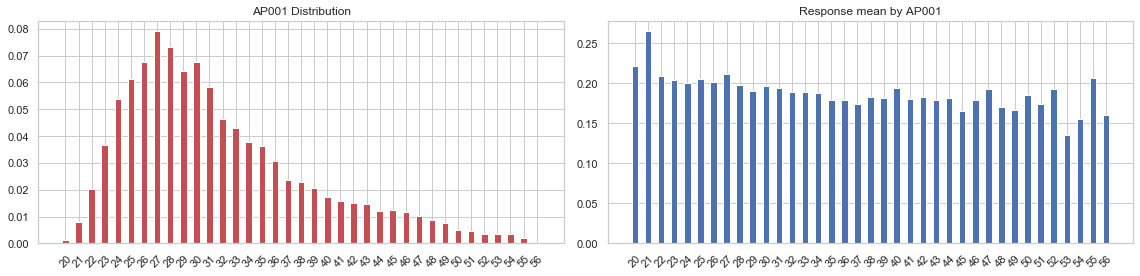

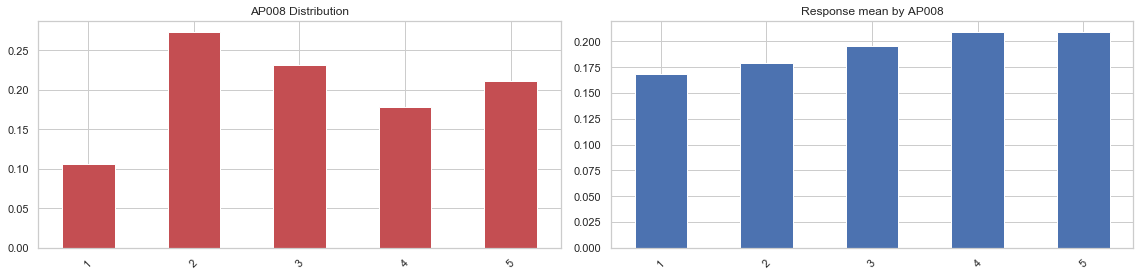

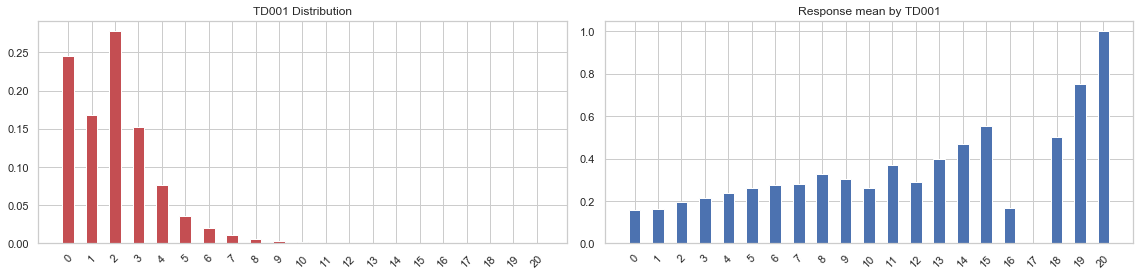

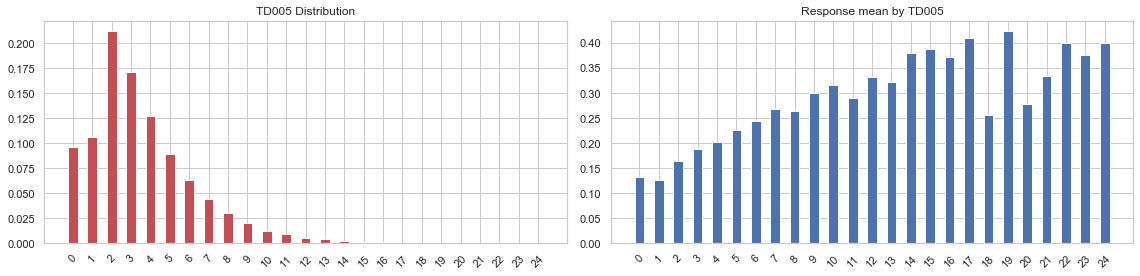

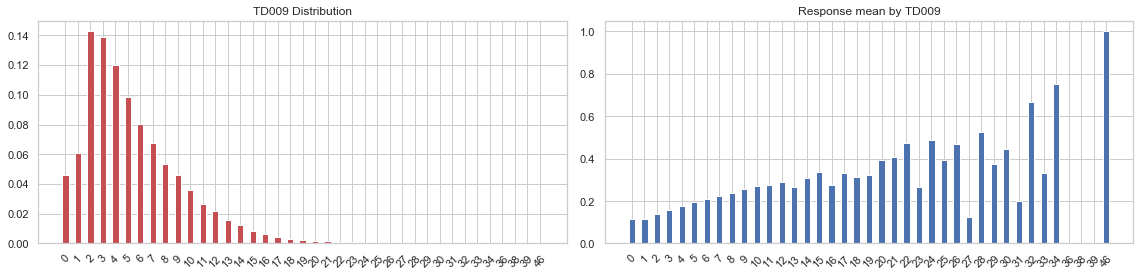

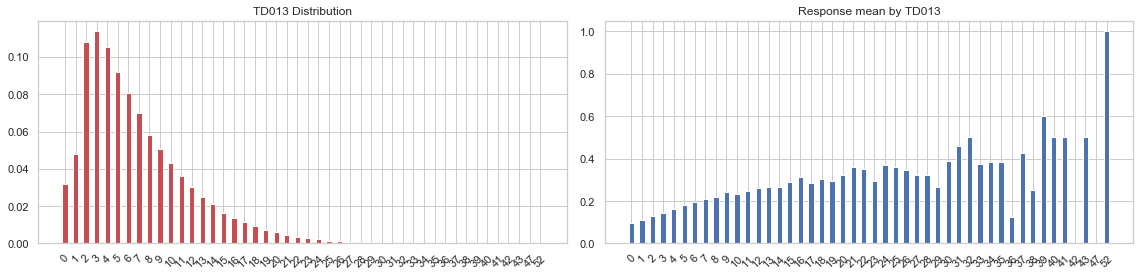

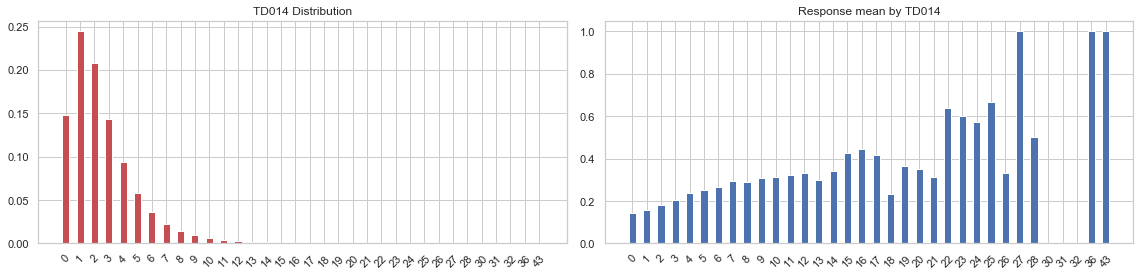

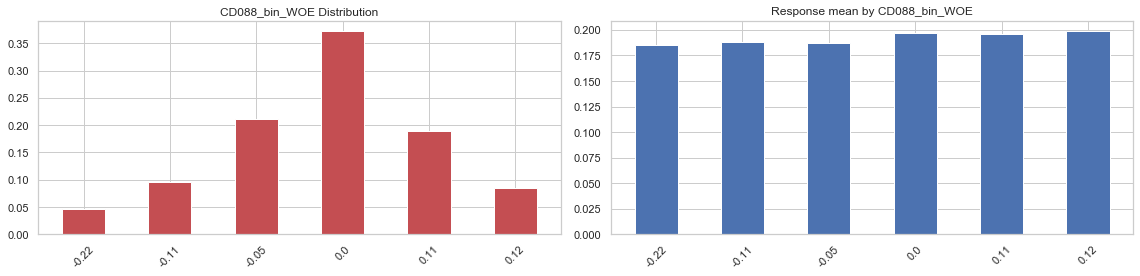

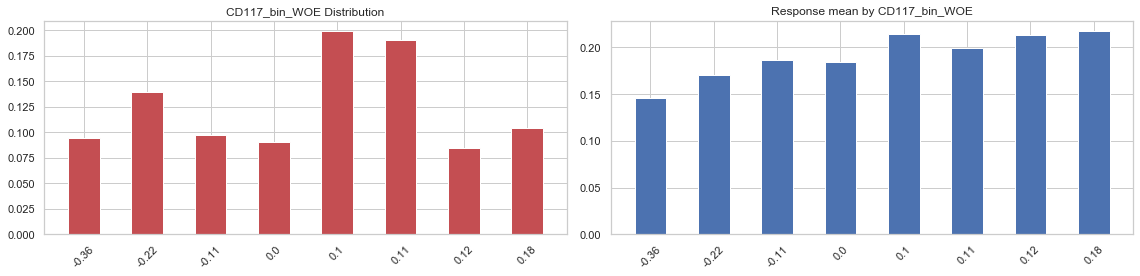

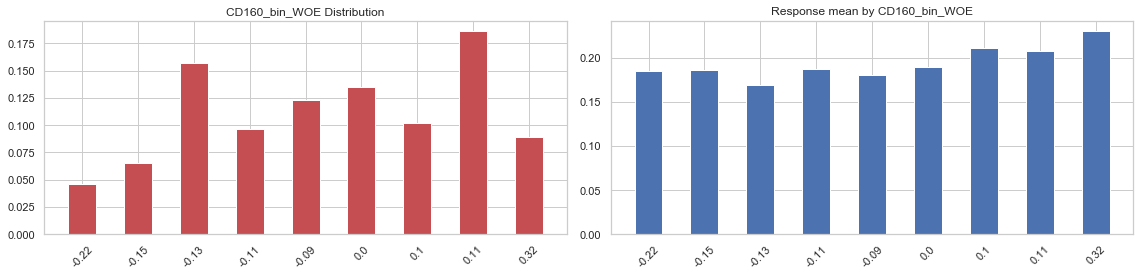

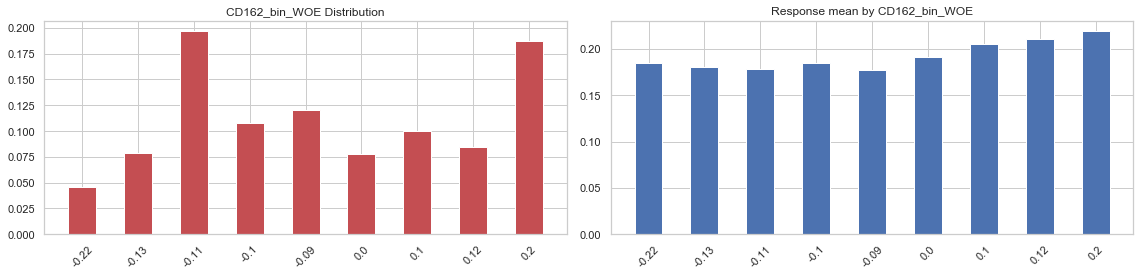

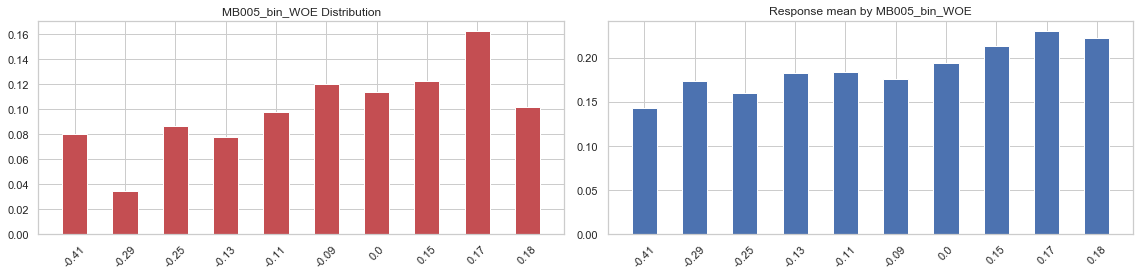

In [41]:
def plot_X_and_Y(var):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    z= df1.groupby(var)['loan_default'].agg(['count','mean']).reset_index() 
    z['count_pcnt'] = z['count']/z['count'].sum()
    x = z[var]
    y_mean = z['mean']
    count_pcnt = z['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5

    fig = plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    #plt.ylabel('X')
    plt.title(var + ' Distribution')
    plt.xticks(ind,x.tolist(), rotation=45)

    plt.subplot(122)
    plt.bar(ind, y_mean, width, color='b')
    #plt.ylabel('Y by X')
    plt.xticks(ind,x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()
    
for i in ('AP001','AP008','TD001','TD005','TD009','TD013','TD014','CD088_bin_WOE','CD117_bin_WOE',
          'CD160_bin_WOE','CD162_bin_WOE','MB005_bin_WOE'):
          plot_X_and_Y(i)  
    

Business Insights from the above distributions:
As the model doesn't predict well, many variables selected actually don't see very different default rates in each bucket. And the following insights are for variables that show correlation with default rate.
First, there's a weak negative relationship between the age of applicants and the default rate (here the age range between 20 and 56), older applicants are less likely to default compared with younger people, which makes sense as people are more financially stable.
Also, as shown by AP008, which is related to IP address and the city, different groups show different default rate(from about 16% to 21%). This might be because of the economic gap between cities.
There are several selected features starting with 'TD', which correspond to the count of query over the past certain period of time, the more queries, the higher default rates. My understanding is that the more query an applicant made means the harder it is for this person to get loan, which might because the applicant is of high risk and the person is also desperate for loan.
There are also several selected variables starting with 'CD', which correspond to the number of calls. The higher the variables, the more likely for the applicant to default. I'm not sure with the exact meaning of these calls, my understanding is that the calls might be related with collection of information or collection of the loans. For either situation, it's obvious that the more calls means the applicant is either unwilling to provide information or to pay the loan and this leads to higher default rate.

### Model Evaluation

In [202]:
#gains table (using the RFE feature selection on decision tree model)
df_prep = pd.DataFrame(columns = ['actual','pred'])
df_prep['actual'] = y_test
df_prep['pred'] =y_pred2
df_prep = df_prep.sort_values(by='pred',ascending=False)
df_prep['row_id'] = range(0,0+len(df_prep))
df_prep.head()

,actual,pred,row_id
41783,0,1,0
70254,0,1,1
32670,0,1,2
73730,0,1,3
31545,0,1,4


In [203]:
df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
df_prep.loc[df_prep['decile'] == 10] =9
df_prep['decile'].value_counts()

9    2400
8    2400
7    2400
6    2400
5    2400
4    2400
3    2400
2    2400
1    2400
0    2400
Name: decile, dtype: int64

In [204]:
# Create gains table with the
gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains

,count,actual
decile,,
0,2400,519
1,2400,547
2,2400,459
3,2400,444
4,2400,420
5,2400,467
6,2400,449
7,2400,458
8,2400,436


In [205]:
gains['non_actual'] = gains['count'] - gains['actual']
gains['cum_count'] = gains['count'].cumsum()
gains['cum_actual'] = gains['actual'].cumsum()
gains['cum_non_actual'] = gains['non_actual'].cumsum()
gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
gains['if_random'] = np.max(gains['cum_actual']) /10
gains['if_random'] = gains['if_random'].cumsum()
gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,2400,519,1881,2400,519,1881,0.11,0.10,464.6,1.12,1.0,21.62
1,2400,547,1853,4800,1066,3734,0.23,0.19,929.2,1.15,4.0,22.21
2,2400,459,1941,7200,1525,5675,0.33,0.29,1393.8,1.09,4.0,21.18
3,2400,444,1956,9600,1969,7631,0.42,0.39,1858.4,1.06,3.0,20.51
4,2400,420,1980,12000,2389,9611,0.51,0.50,2323.0,1.03,1.0,19.91
5,2400,467,1933,14400,2856,11544,0.61,0.60,2787.6,1.02,1.0,19.83
6,2400,449,1951,16800,3305,13495,0.71,0.70,3252.2,1.02,1.0,19.67
7,2400,458,1942,19200,3763,15437,0.81,0.80,3716.8,1.01,1.0,19.60
8,2400,436,1964,21600,4199,17401,0.90,0.90,4181.4,1.00,0.0,19.44


#### ROC

In [206]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
#y_pred = dtree.predict_proba(X_test[features])[:,1]
y_pred=grid.predict(X_test_scaled)
roc_auc_value = roc_auc_score(y_test,y_pred2)
roc_auc_value

0.5190938737493089

In [209]:
fpr, tpr, _ = roc_curve(y_test, y_pred2)
[fpr,tpr]

[array([0.        , 0.21127416, 1.        ]),
 array([0.       , 0.2494619, 1.       ])]

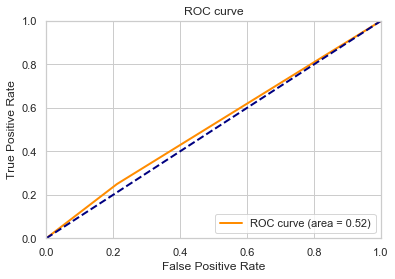

In [210]:
import matplotlib.pyplot as plt
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

As shown in the gains table, the model only has a lift value of 1.12 and a AUC value of 0.52, which show that the model is poor at predicting default and needs further improvement. My understanding is that there might be something neglected during the cleaning phase, but not in the feature selection phase (as different selection methods all have similar results).